# <center> Post Test prediction

# Importing libraries

Importing the various neccessary libraries. The ones being used here are:
* numpy
* pandas
* seaborn
* matplotlib
* scikit learn
* matplotlib
* time

In [79]:
# Enter these in command line to install libraries
'''
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install scikit-learn
'''

'\n!pip install numpy\n!pip install pandas\n!pip install seaborn\n!pip install matplotlib\n!pip install scikit-learn\n'

In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import time
import matplotlib.patches as mpatches

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
%matplotlib inline
warnings.filterwarnings('ignore')

# Importing data

Reading the _csv_ data into a _pandas dataframe_

In [81]:
data = pd.read_csv('test_scores.csv')

Viewing the data using the *head* function

In [82]:
data.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


Since each student's student id is unique, the same will be used as index

In [83]:
data=data.set_index('student_id')

# EDA

Checking the datatype and size of each column

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2133 entries, 2FHT3 to ZVCQ8
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   object 
 2   school_type      2133 non-null   object 
 3   classroom        2133 non-null   object 
 4   teaching_method  2133 non-null   object 
 5   n_student        2133 non-null   float64
 6   gender           2133 non-null   object 
 7   lunch            2133 non-null   object 
 8   pretest          2133 non-null   float64
 9   posttest         2133 non-null   float64
dtypes: float64(3), object(7)
memory usage: 183.3+ KB


Grouping the data by school type, school setting, and tecahing method hen seeing the median for number of students, pretest marks aand postest marks

In [85]:
#display(data.groupby('teaching_method').mean())
display(data.groupby(['school_type','school_setting','teaching_method']).median())

n_student  pretest  posttest
school_type school_setting teaching_method                              
Non-public  Rural          Experimental          15.0     58.0      74.0
                           Standard              16.0     48.0      58.0
            Suburban       Experimental          17.0     65.0      81.0
                           Standard              19.0     67.0      77.0
            Urban          Experimental          21.0     69.5      86.0
                           Standard              20.0     64.0      76.0
Public      Rural          Experimental          22.0     56.0      72.0
                           Standard              21.0     48.0      58.0
            Suburban       Experimental          23.0     67.0      82.5
                           Standard              22.0     60.0      69.0
            Urban          Experimental          28.0     39.0      56.0
                           Standard              28.0     46.0      55.0

Distribution of marks by teaching method

<AxesSubplot:xlabel='posttest', ylabel='Count'>

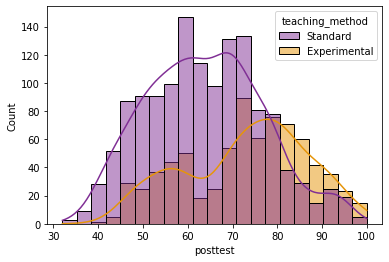

In [86]:
sns.histplot(data,x='posttest',hue="teaching_method",kde=True,palette='CMRmap')

The number of standard and experiimental students for each school

In [87]:
nonstandard = pd.DataFrame(data[data['teaching_method']!='Standard'].groupby('school').count()['n_student']).rename({'n_student':'Experimental'},axis=1)
standard = pd.DataFrame(data[data['teaching_method']=='Standard'].groupby('school').count()['n_student']).rename({'n_student':'Standard'},axis=1)

schools = pd.concat([standard,nonstandard],axis=1)
schools = schools.replace(np.nan, 0)
schools['total']=schools['Standard']+schools['Experimental']
schools=schools.sort_values(by='total',ascending=False).reset_index()
schools

,school,Standard,Experimental,total
0,GOOBU,132.0,26.0,158.0
1,QOQTS,96.0,53.0,149.0
2,UKPGS,68.0,60.0,128.0
3,DNQDD,74.0,48.0,122.0
4,GJJHK,91.0,27.0,118.0
5,ZOWMK,87.0,30.0,117.0
6,VVTVA,54.0,60.0,114.0
7,KZKKE,111.0,0.0,111.0
8,CCAAW,40.0,69.0,109.0
9,CUQAM,83.0,24.0,107.0


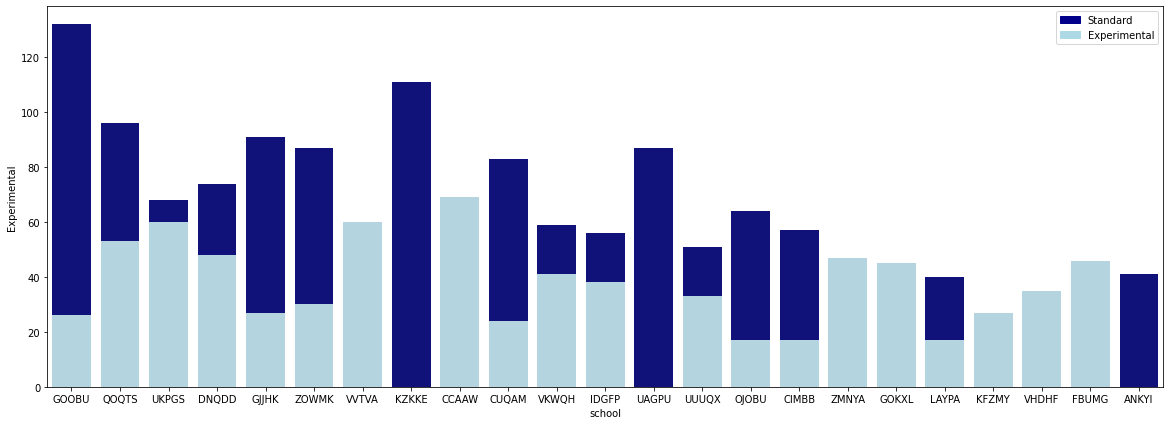

In [88]:
plt.figure(figsize=(20, 7))
bar1 = sns.barplot(x="school",  y="Standard", data=schools, color='darkblue')
bar2 = sns.barplot(x="school", y="Experimental", data=schools, estimator=sum, ci=None,  color='lightblue')
#fig = sns.barplot(schools, x="school", y=["Standard",'Experimental'],title="Number of Students in each school")
top_bar = mpatches.Patch(color='darkblue', label='Standard')
bottom_bar = mpatches.Patch(color='lightblue', label='Experimental')
plt.legend(handles=[top_bar, bottom_bar])
plt.show()

<AxesSubplot:title={'center':'Relation between posttest and pretest marks'}, xlabel='pretest', ylabel='posttest'>

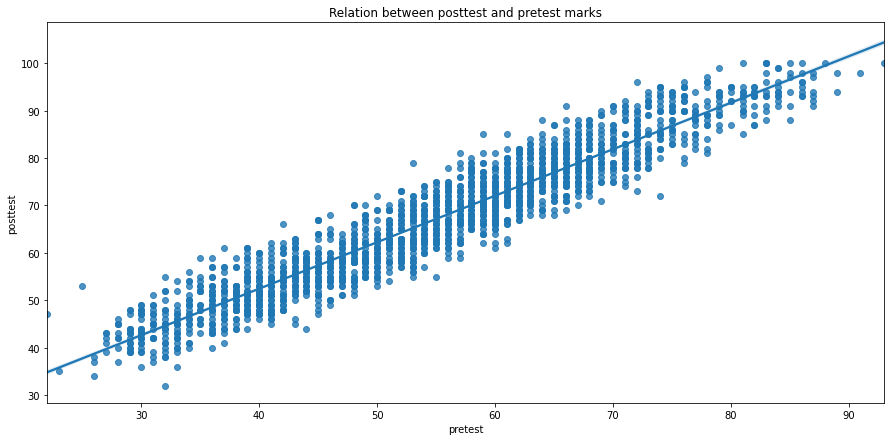

In [107]:
plt.figure(figsize=(15, 7))
plt.title('Relation between posttest and pretest marks')
sns.regplot(data=data, x="pretest", y="posttest", lowess=False)


<AxesSubplot:title={'center':'Teaching Method = Standard'}, xlabel='pretest', ylabel='posttest'>

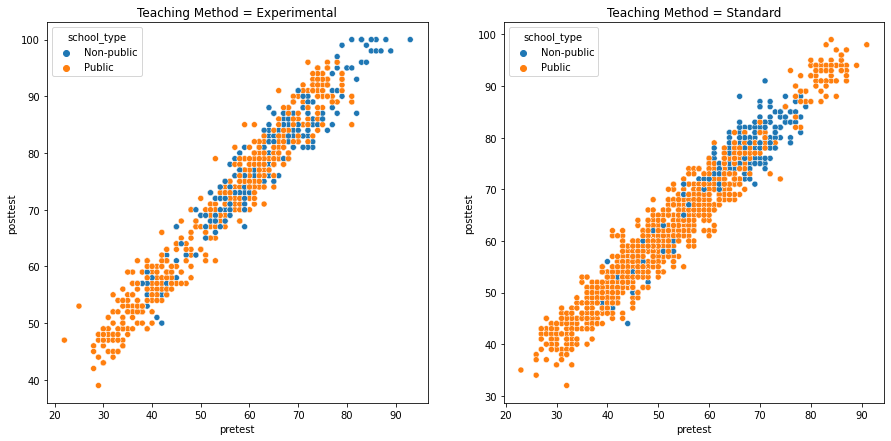

In [90]:
plt.figure(figsize=(15,7))
plt.title('Differnece between posttest and pretest marks of children based on School type')
plt.subplot(1,2,1)
plt.title('Teaching Method = Experimental')
sns.scatterplot(data=data[data['teaching_method']!='Standard'], x="pretest", y="posttest" ,hue="school_type",)
plt.subplot(1,2,2)
plt.title('Teaching Method = Standard')
sns.scatterplot(data=data[data['teaching_method']=='Standard'], x="pretest", y="posttest" ,hue="school_type",)
#plt.title('Differnece between posttest and pretest marks of children based on School type')

<AxesSubplot:title={'center':'Teaching Method = Standard'}, xlabel='pretest', ylabel='posttest'>

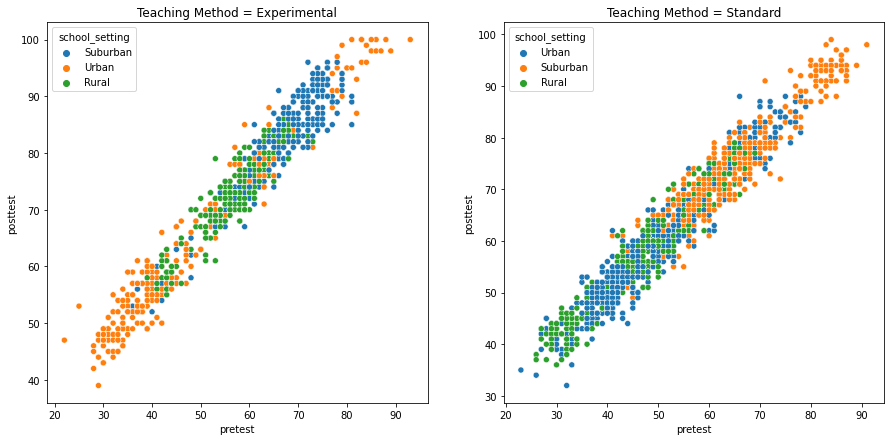

In [91]:
plt.figure(figsize=(15,7))
plt.title('Differnece between posttest and pretest marks of children based on School type')
plt.subplot(1,2,1)
plt.title('Teaching Method = Experimental')
sns.scatterplot(data=data[data['teaching_method']!='Standard'], x="pretest", y="posttest" ,hue="school_setting",)
plt.subplot(1,2,2)
plt.title('Teaching Method = Standard')
sns.scatterplot(data=data[data['teaching_method']=='Standard'], x="pretest", y="posttest" ,hue="school_setting",)

<AxesSubplot:title={'center':'Teaching Method = Standard'}, xlabel='pretest', ylabel='posttest'>

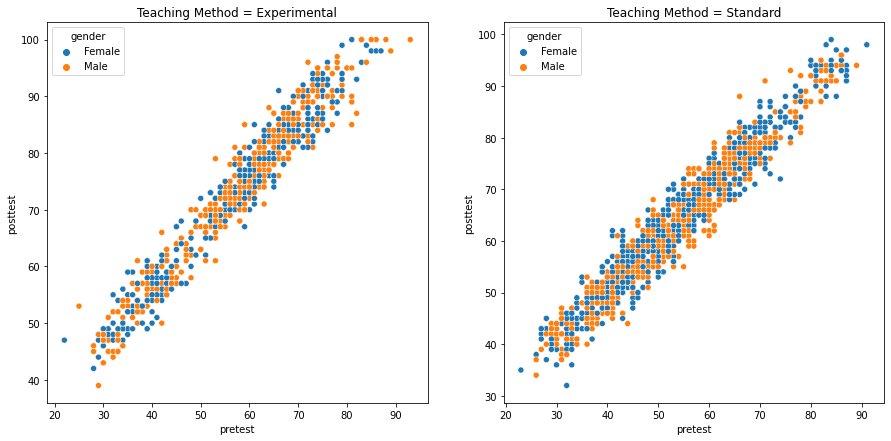

In [92]:
plt.figure(figsize=(15,7))
plt.title('Differnece between posttest and pretest marks of children based on School type')
plt.subplot(1,2,1)
plt.title('Teaching Method = Experimental')
sns.scatterplot(data=data[data['teaching_method']!='Standard'], x="pretest", y="posttest" ,hue="gender",)
plt.subplot(1,2,2)
plt.title('Teaching Method = Standard')
sns.scatterplot(data=data[data['teaching_method']=='Standard'], x="pretest", y="posttest" ,hue="gender",)

<AxesSubplot:title={'center':'Teaching Method = Standard'}, xlabel='pretest', ylabel='posttest'>

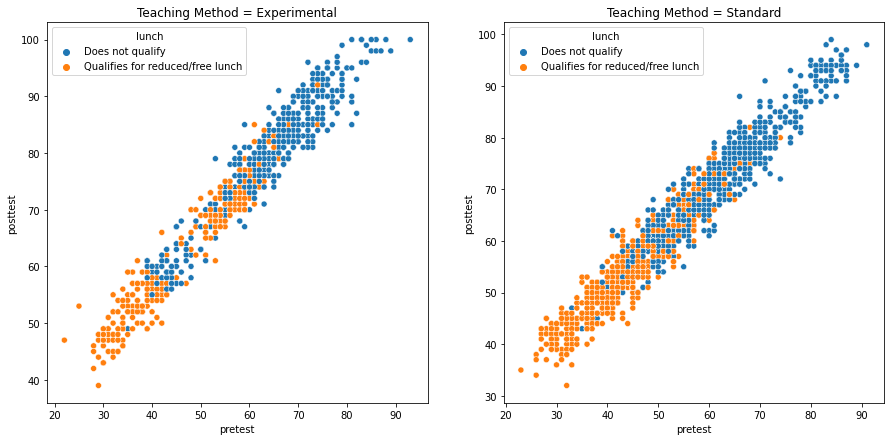

In [93]:
plt.figure(figsize=(15,7))
plt.title('Differnece between posttest and pretest marks of children based on School type')
plt.subplot(1,2,1)
plt.title('Teaching Method = Experimental')
sns.scatterplot(data=data[data['teaching_method']!='Standard'], x="pretest", y="posttest" ,hue="lunch",)
plt.subplot(1,2,2)
plt.title('Teaching Method = Standard')
sns.scatterplot(data=data[data['teaching_method']=='Standard'], x="pretest", y="posttest" ,hue="lunch",)

<Figure size 1080x504 with 0 Axes>

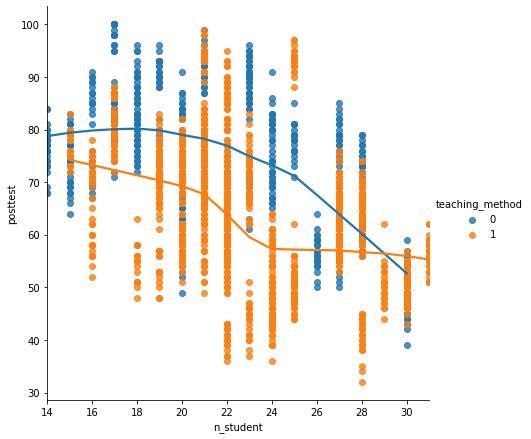

In [110]:
plt.figure(figsize=(15,7))
sns.lmplot(data=data, x="n_student", y="posttest",hue='teaching_method', height=6,lowess =True)

# One Hot Encoding

All the non numeric values are converted to numeric in order for easy deployment of ML models.

In [95]:
from sklearn.preprocessing import LabelEncoder
to_be_encoded = ['school','school_setting','school_type','classroom','teaching_method','gender','lunch']
label_encoder = LabelEncoder()
dfs = []
for i in to_be_encoded:
    temp = pd.DataFrame({'Before Encoding':data[i].unique(),'After Encoding':label_encoder.fit_transform(data[i].unique())})
    dfs.append([temp.sort_values(by=['After Encoding']),i])
    data[i] = label_encoder.fit_transform(data[i])
for i in dfs:
    print(i[1])
    display(i[0])
    print('\n')

school


,Before Encoding,After Encoding
0,ANKYI,0
1,CCAAW,1
2,CIMBB,2
3,CUQAM,3
4,DNQDD,4
5,FBUMG,5
6,GJJHK,6
7,GOKXL,7
8,GOOBU,8
9,IDGFP,9




school_setting


,Before Encoding,After Encoding
2,Rural,0
1,Suburban,1
0,Urban,2




school_type


,Before Encoding,After Encoding
0,Non-public,0
1,Public,1




classroom


,Before Encoding,After Encoding
38,05H,0
67,08N,1
57,0N7,2
32,18K,3
21,197,4
...,...,...
89,YTB,92
27,YUC,93
96,ZBH,94
28,ZDT,95




teaching_method


,Before Encoding,After Encoding
1,Experimental,0
0,Standard,1




gender


,Before Encoding,After Encoding
0,Female,0
1,Male,1




lunch


,Before Encoding,After Encoding
0,Does not qualify,0
1,Qualifies for reduced/free lunch,1


# Feature Splitting

Selecting the columns to be taken as feature set, _X_, and target value, _Y_

In [96]:
X = data.drop('posttest',axis=1)
Y = data['posttest']

In [97]:
Y

student_id
2FHT3    72.0
3JIVH    79.0
3XOWE    76.0
556O0    77.0
74LOE    76.0
         ... 
T8LSK    55.0
VNP26    46.0
YDR1Z    51.0
YUEIH    53.0
ZVCQ8    48.0
Name: posttest, Length: 2133, dtype: float64

# Feature Scaling

Due the large range of pretest values and n_stufdents (continuous variale), they are scaled down using the standard scaler.<br>
Othe features are ot scaled down as they are catergorical variables

In [98]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[['pretest','n_student']] = sc.fit_transform(X[['pretest','n_student']])

# Test Train split

Splitting the data into training anad test set. The test set comprises of 30% of the data.

In [99]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=52)

# Model Selection

We import multiple models to apply regression<br>
Models deployed:
* Lasso
* ElasticNet
* Decision Tree
* K Neighbours
* Gradient Boosting
* Multi Level Perceptron
* Linear Regression
* Random Forest (unoptimised)
* Random Forest optimised using grid search

In [100]:
# Lasso regresor
from sklearn.linear_model import Lasso
lasso=Lasso()

#ElasticNet
from sklearn.linear_model import ElasticNet
enet=ElasticNet()

#Decision Tree
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()

#KNR
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()

#Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()

#MLP
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(random_state=1, max_iter=500)

# Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

#Random Forest
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

#RandomForest with Grid Search
n_estimators = [int(x) for x in np.arange(10,500,2)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.arange(1,50,1)]
max_depth.append(None)
min_samples_split = [int(x) for x in np.arange(1,50,1)]
min_samples_leaf = [int(x) for x in np.arange(1,10,1)]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

The _models_ array will contain the models we will test

In [112]:
models = [lr,rf,rf_random,mlp,lasso,enet,gbr,dtr,knr]

The code below iterates throgh all the models while fitting, predicting and testing the models from the _models_ array

In [113]:
from sklearn import metrics
model_acc = []
model_mae = []
model_mse = []
model_rmse = []
model_time = []

for i in models:
    start=time.time()
    i.fit(X_train,Y_train)
    stop=time.time()
    pred = i.predict(X_test)
    h=[]
    for j in pred:
        h.append(round(j,0))
    model_acc.append(round((i.score(X_test, Y_test)*100),2))
    model_mae.append(round((metrics.mean_absolute_error(Y_test, h)),2))                 
    model_mse.append(round((metrics.mean_squared_error(Y_test, h)),2))
    model_rmse.append(round(np.sqrt(metrics.mean_squared_error(Y_test, h)),2))
    model_time.append(stop-start)
models = pd.DataFrame({'Models':models,'Accuracy':model_acc,'MAE':model_mae,'MSE':model_mse,'RMSE':model_rmse,'Time (s)':model_time})

Fitting 3 folds for each of 100 candidates, totalling 300 fits


The results from the previous loop are fit into a dataframe

In [114]:
models = models.sort_values(by=['Accuracy'],ascending=False).reset_index().drop('index',axis=1)
best = models['Models'][0]
models['Models']=models['Models'].astype(str).str.split("(", n = 2, expand = True)[0]
models

,Models,Accuracy,MAE,MSE,RMSE,Time (s)
0,RandomizedSearchCV,95.51,2.38,9.12,3.02,18.515672
1,GradientBoostingRegressor,95.08,2.50,9.99,3.16,0.082792
2,KNeighborsRegressor,94.99,2.54,10.17,3.19,0.002992
3,LinearRegression,94.91,2.54,10.32,3.21,0.002992
4,RandomForestRegressor,94.52,2.63,11.12,3.33,0.248337
5,Lasso,92.34,3.17,15.55,3.94,0.001995
6,DecisionTreeRegressor,92.05,3.12,16.12,4.01,0.003990
7,MLPRegressor,92.01,3.17,16.20,4.02,2.144692
8,ElasticNet,81.71,4.93,37.11,6.09,0.000998


The best model is printed with its metrics.
<br>A histogram is made to see that which value of error has the highestdensity
<br>A scatterplot is made to compare actual test values with predicted ones

Thus,the best model is RandomizedSearchCV
Accuracy: 95.54
MAE: 2.35
MSE: 9.07
RMSE: 3.01


<AxesSubplot:xlabel='error', ylabel='Density'>

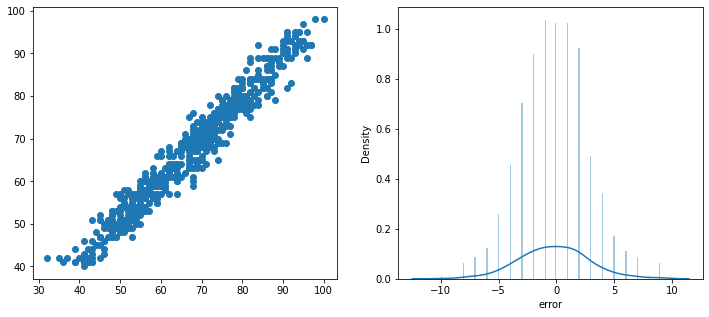

In [104]:
print('Thus,the best model is',models['Models'][0])
print('Accuracy:',models['Accuracy'][0])
print('MAE:',models['MAE'][0])
print('MSE:',models['MSE'][0])
print('RMSE:',models['RMSE'][0])

pred = best.predict(X_test)
h=[]
for i in pred:
    h.append(round(i,0))
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(Y_test,h)
plt.subplot(1,2,2)
sns.distplot((Y_test-h),bins=150,axlabel = "error")